In [67]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from scipy.special import softmax
from numpy.random import default_rng
from tqdm import tqdm

In [68]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

class Hopfield3:
    def __init__(self, X, B):
        self.X = X # d*N
        self.B = B
        self.N = X.shape[1]
        self.M = np.max(np.linalg.norm(self.X, axis=0))
        self.C = (1/self.B)*(np.log(self.N)) + 0.5*self.M**2
    
    def E(self, s):
        v = np.dot(self.X.T, s)
        lse = (1/self.B)*np.log(np.sum(np.exp(self.B*v)))
        return  -lse + 0.5*np.dot(s,s.T) + self.C 
    
    def update(self, s):
        v = np.dot(self.X.T, s)
        return np.dot(self.X, softmax(self.B*v))
    
    def simulate(self, s):
        E_old = None 
        E = self.E(s)
        c = 0
        while(E != E_old and c<=10):
            c += 1
            #print(E)
            s = self.update(s)
            E_old = E
            E = self.E(s)
        return s

In [69]:
# Set up Hopfield Net
X = x_test.T.copy()
norm = np.linalg.norm(X, axis=0)
X = np.multiply(X, 1/norm)
X = X/np.max(X)
mu = np.mean(X)
sigma = np.std(X)
B = 4.0
H = Hopfield3(X, B)

# parameters
erp = 0.5
d = 784

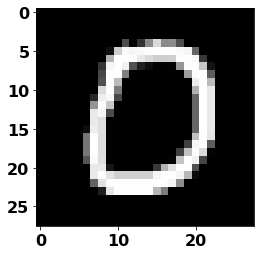

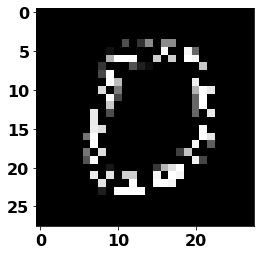

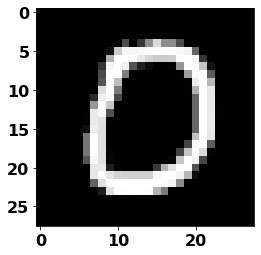

0.03955535


In [70]:
rng = default_rng()
ref = X[:,10]
im1 = X[:,10].copy()

plt.imshow(im1.reshape(28,28), cmap="Greys_r")
plt.savefig("original.png", dpi=150)
plt.show()

idx = rng.choice(784, size=int(erp*d), replace=False)
im1[idx] = 0

plt.imshow(im1.reshape(28,28), cmap="Greys_r")
plt.savefig("distorted.png", dpi=150)
plt.show()

im_out = H.simulate(im1)
plt.imshow(im_out.reshape((28,28)), cmap="Greys_r")
plt.savefig("retrieved.png", dpi=150)
plt.show()
print(np.linalg.norm(im_out - ref))

In [ ]:
# Testing/Plotting noise vs retieval ratio. 
B = np.linspace(0.1, 4.1, 20)
perc_initial_error = [0.25, 0.5, 0.75]
retrieval = np.zeros((3, len(B)))

for i, p in enumerate(perc_initial_error):
  print(p)
  for j, b in enumerate(B):
    H = Hopfield3(X, b)
    test_patterns = X[:, rng.choice(X.shape[1], size=100, replace=False)]
    temp = []
    for k in range(test_patterns.shape[1]):
      im = test_patterns[:, k].copy()
      idx = rng.choice(784, size=int(p*784), replace=False)
      im[idx] = 0
      im_out = H.simulate(im)
      temp.append(np.linalg.norm((im_out - im)))
    retrieval[i, j] = np.mean(temp)

0.25
0.5
0.75


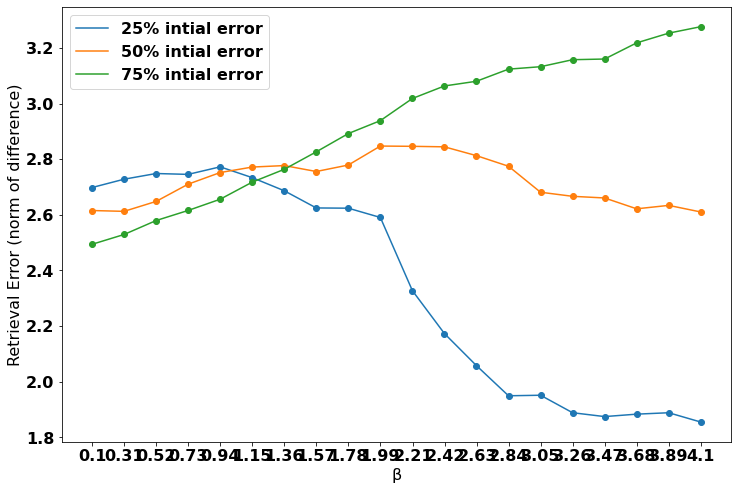

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(B, retrieval[0,:])
plt.scatter(B, retrieval[0,:])
plt.plot(B, retrieval[1,:])
plt.scatter(B, retrieval[1,:])
plt.plot(B, retrieval[2,:])
plt.scatter(B, retrieval[2,:])
plt.xticks(B, labels=B)

plt.ylabel("Retrieval Error (norm of difference)")
plt.xlabel("β")
plt.xticks(np.round(B,2), labels=np.round(B,2))
plt.legend(["{}% intial error".format(round(x*100)) for x in perc_initial_error])
plt.savefig("MNIST Pattern Retrieval 2.png", dpi=150)

In [ ]:
from tqdm import tqdm

# Plotting surface of B x P

B = np.linspace(1.5, 3.5, 10) #beta
P = np.linspace(0.25, 0.75, 10) #% initial error
ret_err = np.zeros((10, 10)) # BxP

for row, b in tqdm(enumerate(B)):
  H = Hopfield3(X, b)
  for col, p in enumerate(P):
    test_patterns = X[:, rng.choice(X.shape[1], size=100, replace=False)]
    temp = []
    for k in range(test_patterns.shape[1]):
      im = test_patterns[:, k].copy()
      idx = rng.choice(784, size=int(p*784), replace=False)
      im[idx] = 0
      im_out = H.simulate(im)
      temp.append(np.linalg.norm((im_out - im)))
    ret_err[row, col] = np.mean(temp)


0it [00:00, ?it/s]
1it [01:25, 85.54s/it]
2it [02:53, 86.19s/it]
3it [04:21, 86.80s/it]
4it [05:48, 86.77s/it]
5it [07:17, 87.40s/it]
6it [08:41, 86.44s/it]
7it [10:08, 86.62s/it]
8it [11:35, 86.85s/it]
9it [12:58, 85.68s/it]
10it [14:18, 85.90s/it]


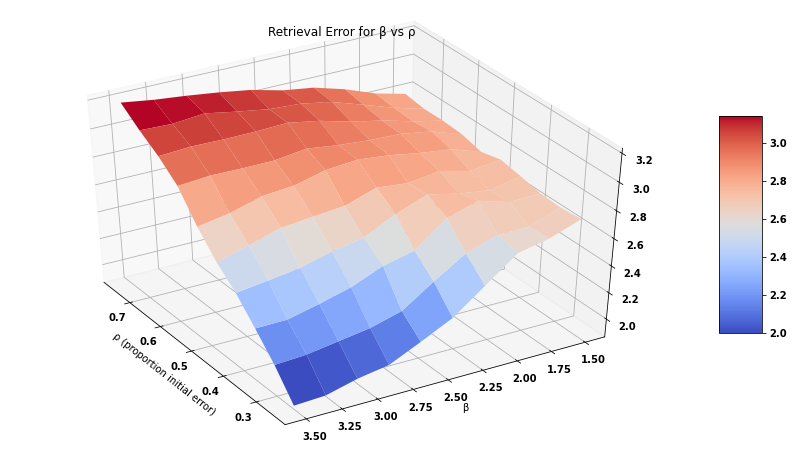

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111, projection='3d')


x_ = np.linspace(0.25, 0.75, 10)
y_ = np.linspace(1.5, 3.5, 10)
X_,Y_ = np.meshgrid(x_,y_)
Z = ret_err


ax1.set_title('Retrieval Error for β vs ρ')
ax1.set_ylabel('β')
ax1.set_xlabel('ρ (proportion initial error)')
#ax1.set_yticklabels(np.round(y*10,2))
surf1 = ax1.plot_surface(X_, Y_, Z, cmap="coolwarm")
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

plt.rcParams.update({'font.size': 16})

# rotate the axes and update
for ii in range(0,150,1):
        ax1.view_init(elev=40., azim=ii)


plt.savefig("Hopfield_surface.png", dpi=150)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'kind'
  **contour_kws,


2.70805020110221


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'kind'
  **contour_kws,


2.0794415416798357


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'kind'
  **contour_kws,


1.6094379124341003


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'kind'
  **contour_kws,


1.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'kind'
  **contour_kws,


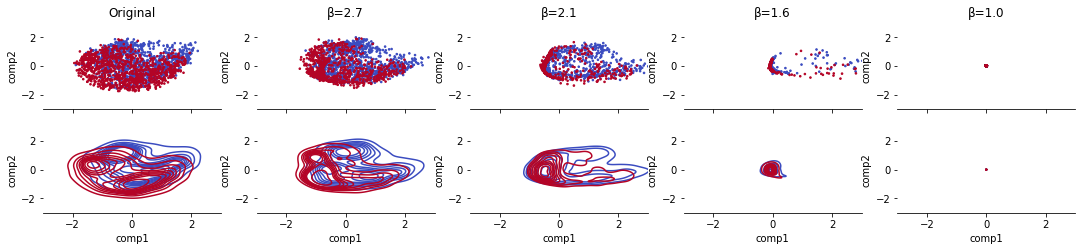

In [ ]:
from sklearn.decomposition import PCA

idx = np.concatenate((np.where(y_test==4)[0], np.where(y_test == 9)[0]))
Y = X[:, idx].copy()

pca = PCA(n_components=2)
X_r = pca.fit(Y.T).transform(Y.T)
B = [1.0, np.log(5), np.log(8), np.log(15)]
B.reverse()

fig, ax = plt.subplots(2,5, sharex=True)
fig.set_size_inches(18.5, 3.5)
sns.despine(left=True)

ax[0][0].scatter(X_r[:,0], X_r[:, 1], c=y_test[idx], cmap="coolwarm", s=2.5)
ax[0][0].set_title("Original")
ax[0][0].set_ylabel("comp2")
ax[0][0].set_xlim(-3,3)
ax[0][0].set_ylim(-3,3)

data = np.concatenate((X_r,  y_test[idx].reshape((-1,1))), axis=1)
df = pd.DataFrame(data, columns=["comp1", "comp2", "label"])
sns.set_palette("coolwarm")
sns.kdeplot(
    data=df,
    x="comp1", y="comp2", hue="label",
    kind="kde", 
    palette="coolwarm",
    ax = ax[1][0]
)
ax[1][0].set_xlim(-3,3)
ax[1][0].set_ylim(-3,3)
ax[1][0].get_legend().remove()

for i in range(4):
  j = i+1
  print(B[i])
  H = Hopfield3(Y,B=B[i])
  Y_hop = np.array([H.simulate(Y[:,i]) for i in range(Y.shape[1])]).T
  X_r = pca.fit(Y_hop.T).transform(Y_hop.T)
  ax[0][j].scatter(X_r[:,0], X_r[:, 1], c=y_test[idx], cmap="coolwarm", s=2.5)
  ax[0][j].set_title("β={}".format(np.round(B[i], 1)))
  ax[0][j].set_ylabel("comp2")
  ax[0][j].set_xlim(-3,3)
  ax[0][j].set_ylim(-3,3)

  data = np.concatenate((X_r,  y_test[idx].reshape((-1,1))), axis=1)
  df = pd.DataFrame(data, columns=["comp1", "comp2", "label"])
  sns.set_palette("coolwarm")
  sns.kdeplot(
      data=df,
      x="comp1", y="comp2", hue="label",
      kind="kde", 
      palette="coolwarm",
      ax = ax[1][j]
  )
  ax[1][j].set_xlim(-3,3)
  ax[1][j].set_ylim(-3,3)
  ax[1][j].get_legend().remove()

plt.savefig("test.png", dpi=150)